In [ ]:
print("1. Quick sanity check:")
print("- Shows the first 3 rows of the final DataFrame:")
print("- Prints the total number of entries after merging and cleaning:")
print("- Displays the number of missing values per column to assess data quality: \n")

import pandas as pd
import glob

file_paths = sorted(glob.glob("archive/book*.csv"))
df_list = [pd.read_csv(fp) for fp in file_paths]
df = pd.concat(df_list, ignore_index=True)

df.drop_duplicates(inplace=True)

columns_to_drop = [
    'Rating', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4',
    'RatingDist5', 'RatingDistTotal', 'Description', 'Count of text reviews'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Cleaning filtration
df = df[df['pagesNumber'] > 1]
df = df[df['CountsOfReview'] >= 0]
df = df[df['PublishYear'].between(1800, 2025)]

df['Decade'] = (df['PublishYear'] // 10 * 10).astype(str) + 's'

# Index reseting
df.reset_index(drop=True, inplace=True)

# Fast check
print(df.head(3), "\n")
print("Count of:", len(df), "\n")
print(df.isnull().sum())


1. Quick sanity check:

- Shows the first 3 rows of the final DataFrame:
- Prints the total number of entries after merging and cleaning:
- Displays the number of missing values per column to assess data quality:
   Id                                               Name  pagesNumber  \
0   1  Harry Potter and the Half-Blood Prince (Harry ...        652.0   
1   2  Harry Potter and the Order of the Phoenix (Har...        870.0   
2   3  Harry Potter and the Sorcerer's Stone (Harry P...        309.0   

   PublishMonth  PublishDay        Publisher  CountsOfReview  PublishYear  \
0            16           9  Scholastic Inc.           28062         2006   
1             1           9  Scholastic Inc.           29770         2004   
2             1          11   Scholastic Inc           75911         2003   

  Language       Authors        ISBN  PagesNumber Decade  
0      eng  J.K. Rowling         NaN          NaN  2000s  
1      eng  J.K. Rowling  0439358078          NaN  2000s  
2      e

In [4]:
print("2. Data enrichment and filtering:")
print("- Missing values in 'Publisher' and 'Language' columns are filled with default labels.")
print("- 'PublishMonthName' is derived from 'PublishMonth' using the calendar module.")
print("- 'LengthCategory' is added based on the number of pages (short/medium/long).")
print("- Rare languages (less than 500 books) are filtered out to focus on major languages.\n")

import numpy as np
import calendar

df['Publisher'] = df['Publisher'].fillna('Unknown Publisher')
df['Language'] = df['Language'].fillna('Unknown Language')  

df['PublishMonthName'] = df['PublishMonth'].apply(lambda x: calendar.month_name[x] if 1 <= x <= 12 else 'Unknown')

def classify_length(pages):
    if pages <= 100:
        return 'short'
    elif pages <= 300:
        return 'medium'
    else:
        return 'long'

df['LengthCategory'] = df['pagesNumber'].apply(classify_length)

language_counts = df['Language'].value_counts()
common_languages = language_counts[language_counts >= 500].index
df = df[df['Language'].isin(common_languages)].reset_index(drop=True)

print("First 5 rows of the dataframe:\n")
print(df[['pagesNumber', 'LengthCategory', 'Language', 'PublishMonthName']].head(5))

print("\nMost common languages in the dataset:\n")
print(df['Language'].value_counts().head())


2. Data enrichment and filtering:
- Missing values in 'Publisher' and 'Language' columns are filled with default labels.
- 'PublishMonthName' is derived from 'PublishMonth' using the calendar module.
- 'LengthCategory' is added based on the number of pages (short/medium/long).
- Rare languages (less than 500 books) are filtered out to focus on major languages.

First 5 rows of the dataframe:

   pagesNumber LengthCategory Language PublishMonthName
0        652.0           long      eng          Unknown
1        870.0           long      eng          January
2        309.0           long      eng          January
3        352.0           long      eng          January
4        435.0           long      eng          January

Most common languages in the dataset:

Language
Unknown Language    669928
eng                 119371
en-US                16399
fre                   6519
en-GB                 5035
Name: count, dtype: int64


3. Visualization summary:
- Line chart of number of published books per year
- Line chart of average page count per year
- Bar chart of top 10 authors by number of books
- Bar chart of top 10 publishers by number of books
- Bar chart of average review count per decade
- Bar chart of top 10 most common languages



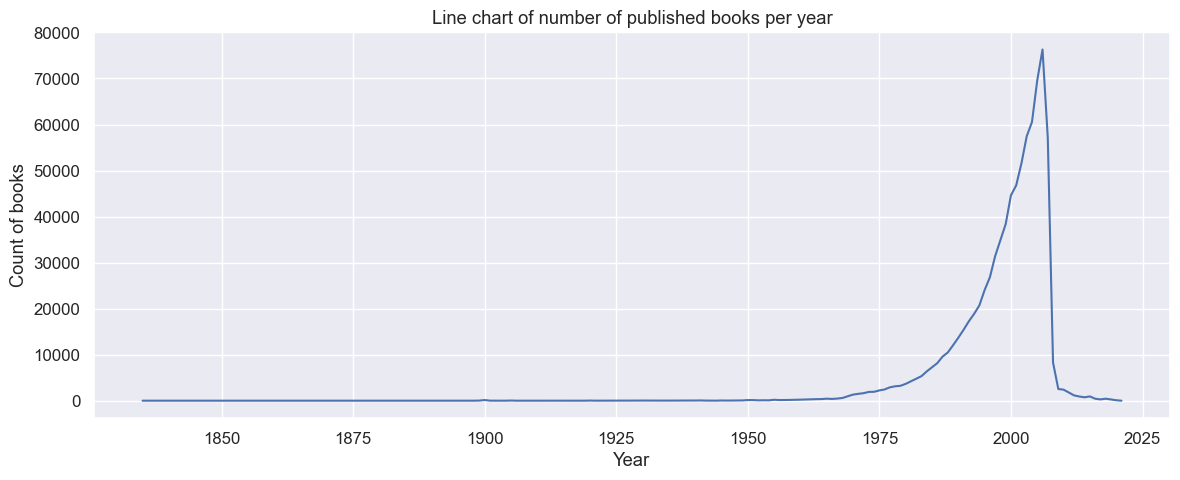

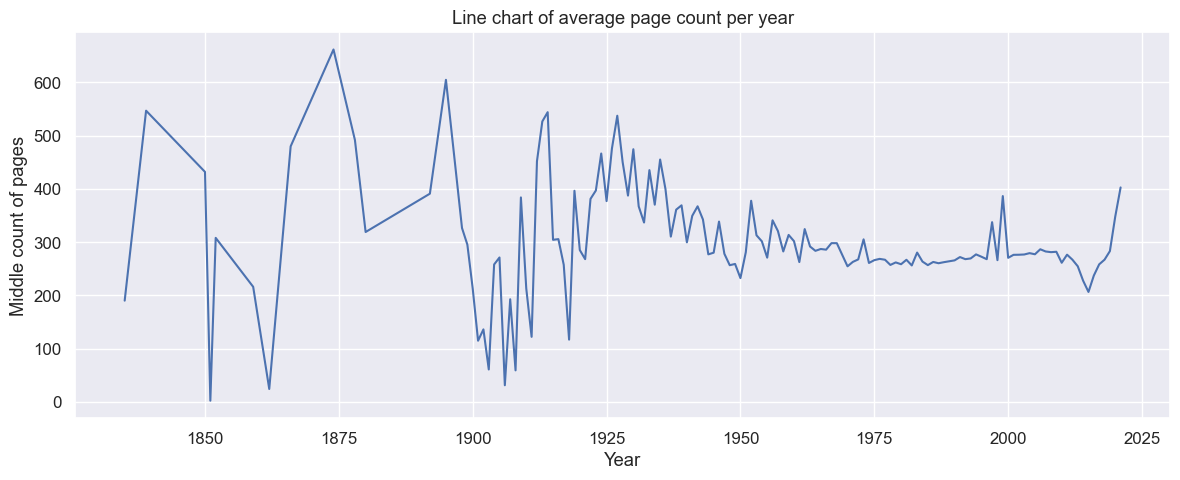

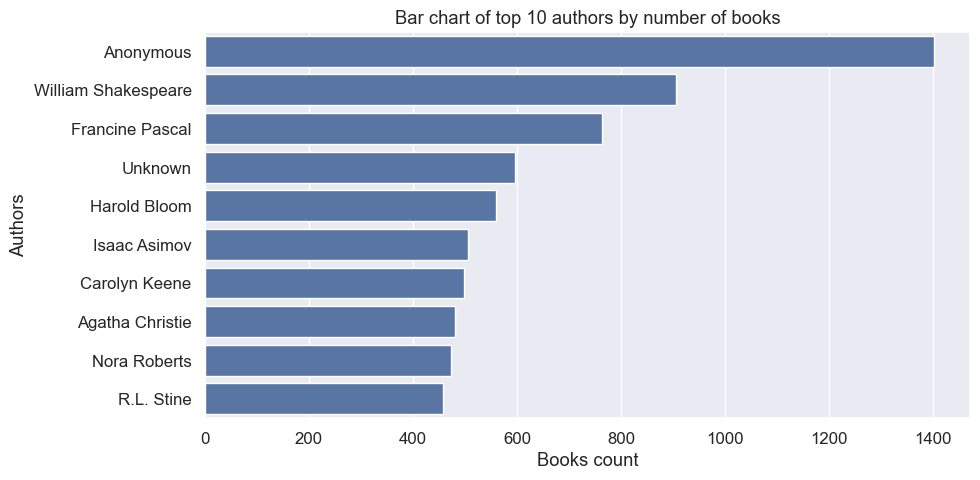

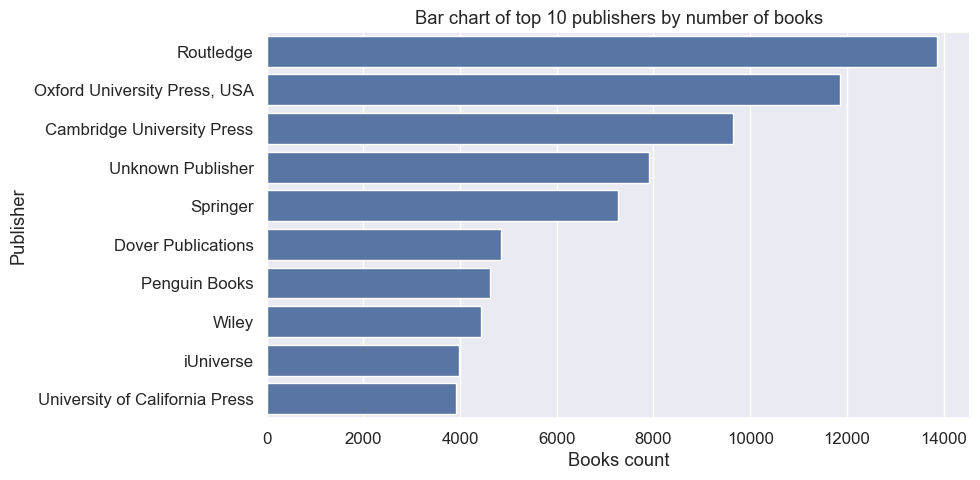

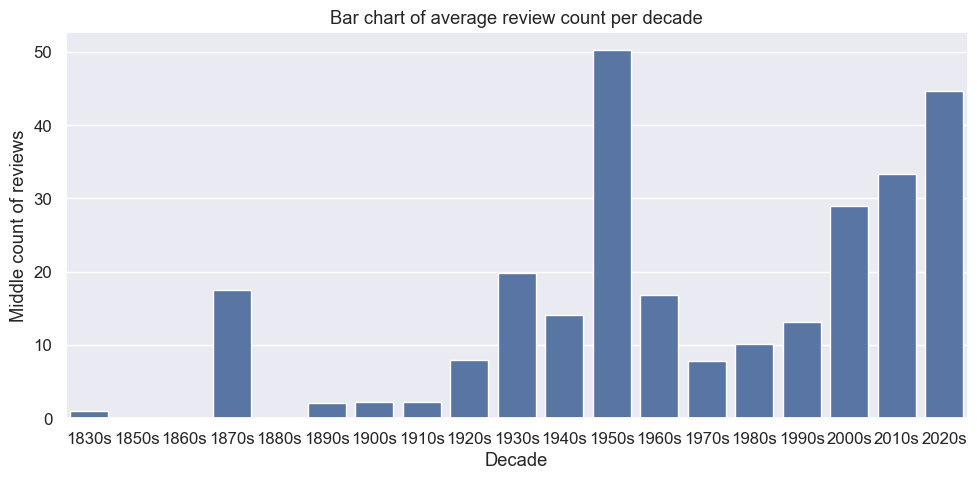

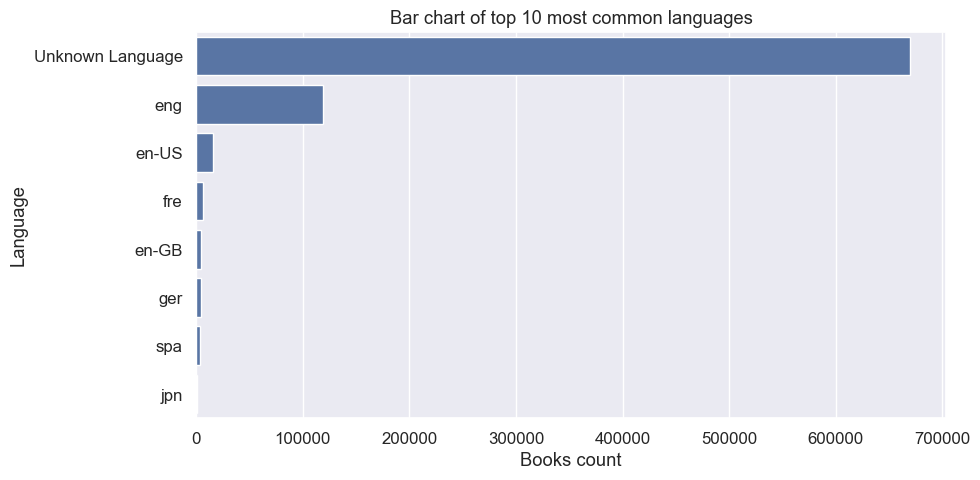

In [5]:
print("3. Visualization summary:")
print("- Line chart of number of published books per year")
print("- Line chart of average page count per year")
print("- Bar chart of top 10 authors by number of books")
print("- Bar chart of top 10 publishers by number of books")
print("- Bar chart of average review count per decade")
print("- Bar chart of top 10 most common languages\n")

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)

# 1. Count of books per year
books_per_year = df['PublishYear'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
books_per_year.plot(kind='line')
plt.title('Line chart of number of published books per year')
plt.xlabel('Year')
plt.ylabel('Count of books')
plt.tight_layout()
plt.show()

# 2. Middle page count per year
avg_pages_per_year = df.groupby('PublishYear')['pagesNumber'].mean()
plt.figure(figsize=(12, 5))
avg_pages_per_year.plot()
plt.title('Line chart of average page count per year')
plt.xlabel('Year')
plt.ylabel('Middle count of pages')
plt.tight_layout()
plt.show()

# 3. Top 10 authors by published books
top_authors = df['Authors'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Bar chart of top 10 authors by number of books')
plt.xlabel('Books count')
plt.tight_layout()
plt.show()

# 4. Top 10 publishers
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Bar chart of top 10 publishers by number of books')
plt.xlabel('Books count')
plt.tight_layout()
plt.show()

# 5. Middle count of reviews for decades
avg_reviews_by_decade = df.groupby('Decade')['CountsOfReview'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_reviews_by_decade.index, y=avg_reviews_by_decade.values)
plt.title('Bar chart of average review count per decade')
plt.ylabel('Middle count of reviews')
plt.xlabel('Decade')
plt.tight_layout()
plt.show()

# 6. Language dispersion
top_languages = df['Language'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title('Bar chart of top 10 most common languages')
plt.xlabel('Books count')
plt.tight_layout()
plt.show()


In [6]:
print("4. Loading and summarizing user ratings data:")
print("- Shows the first 3 rows of the combined user ratings DataFrame")
print("- Prints the total number of user reviews across all files")
print("- Displays the number of unique books rated by users\n")

ratings_paths = sorted(glob.glob("archive/user_rating_*.csv"))

ratings_list = [pd.read_csv(fp) for fp in ratings_paths]
ratings_df = pd.concat(ratings_list, ignore_index=True)

print(ratings_df.head(3))
print("Reviews count:", len(ratings_df))
print("Unique books count:", ratings_df['Name'].nunique())

4. Loading and summarizing user ratings data:
- Shows the first 3 rows of the combined user ratings DataFrame
- Prints the total number of user reviews across all files
- Displays the number of unique books rated by users

   ID                                               Name          Rating
0   1  Agile Web Development with Rails: A Pragmatic ...  it was amazing
1   1  The Restaurant at the End of the Universe (Hit...  it was amazing
2   1                                         Siddhartha  it was amazing
Reviews count: 362596
Unique books count: 103533


5. Visualization of top 10 most positively reviewed books:
- Filters ratings to include only positive feedback ('it was amazing', 'really liked it')
- Identifies the 10 books with the highest number of positive reviews
- Displays a horizontal bar chart of those books



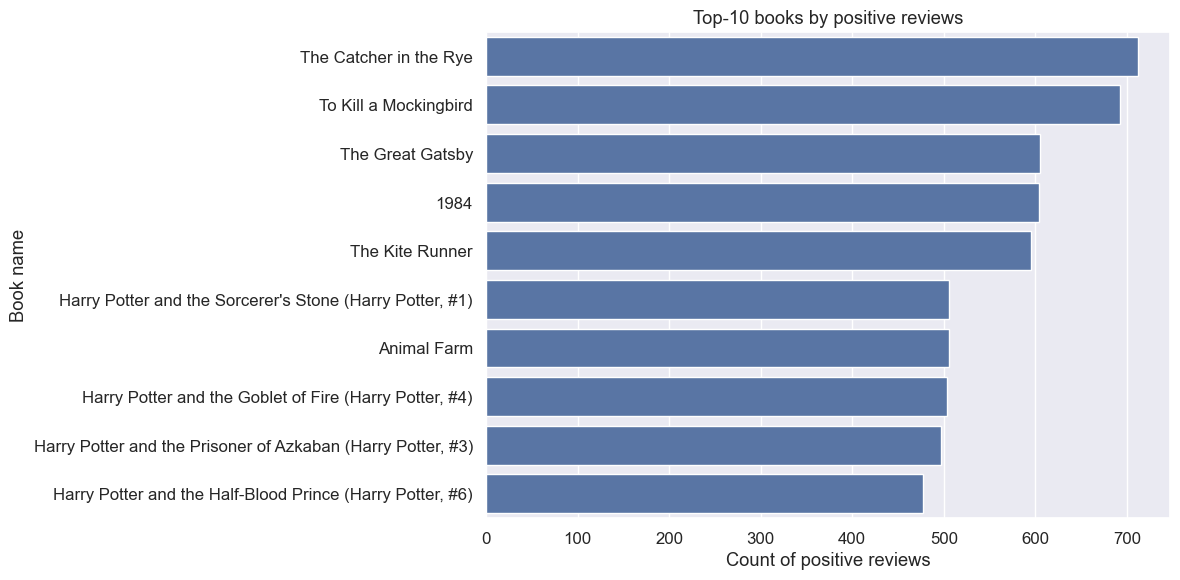

In [7]:
print("5. Visualization of top 10 most positively reviewed books:")
print("- Filters ratings to include only positive feedback ('it was amazing', 'really liked it')")
print("- Identifies the 10 books with the highest number of positive reviews")
print("- Displays a horizontal bar chart of those books\n")

import matplotlib.pyplot as plt
import seaborn as sns

positive_ratings = ['it was amazing', 'really liked it']

positive_df = ratings_df[ratings_df['Rating'].isin(positive_ratings)]

top_loved_books = positive_df['Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_loved_books.values, y=top_loved_books.index)
plt.title('Top-10 books by positive reviews')
plt.xlabel('Count of positive reviews')
plt.ylabel('Book name')
plt.tight_layout()
plt.show()

6. Analyzing positive reviews by publication year (from 1949 onward):
- Merges the ratings dataset with the main books dataset on book name
- Filters to include only positive reviews ('it was amazing', 'really liked it')
- Considers only books published in or after 1949
- Plots a bar chart showing the number of positive reviews by publication year

                                                Name          Rating  \
0  Agile Web Development with Rails: A Pragmatic ...  it was amazing   
1  The Restaurant at the End of the Universe (Hit...  it was amazing   
2  The Restaurant at the End of the Universe (Hit...  it was amazing   
3                                         Siddhartha  it was amazing   
4                                         Siddhartha  it was amazing   

   PublishYear        Authors  
0         2005    Dave Thomas  
1         2005  Douglas Adams  
2         1981  Douglas Adams  
3         2004  Hermann Hesse  
4         2000  Hermann Hesse  


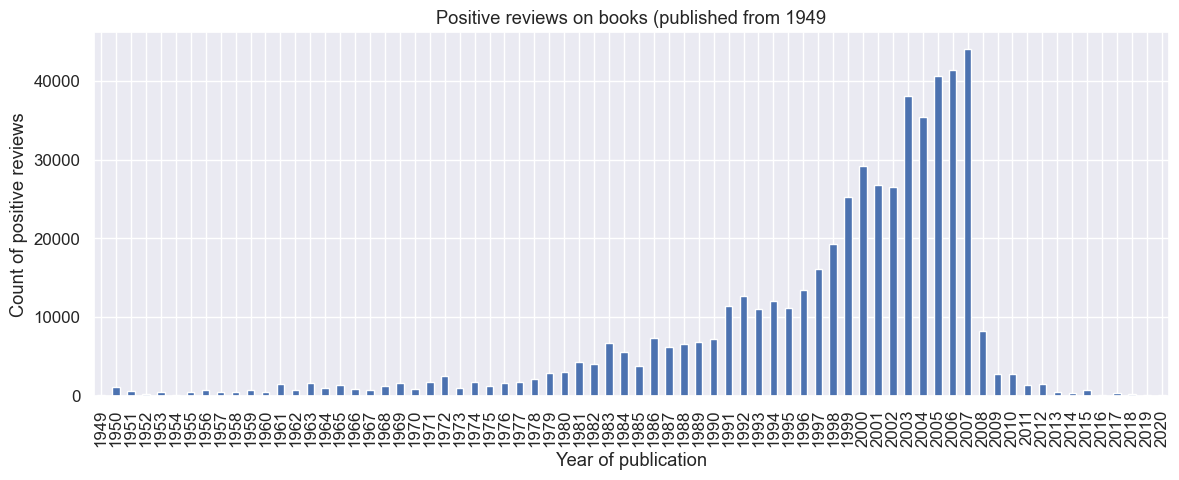

In [8]:
print("6. Analyzing positive reviews by publication year (from 1949 onward):")
print("- Merges the ratings dataset with the main books dataset on book name")
print("- Filters to include only positive reviews ('it was amazing', 'really liked it')")
print("- Considers only books published in or after 1949")
print("- Plots a bar chart showing the number of positive reviews by publication year\n")

merged_df = pd.merge(ratings_df, df, on="Name", how="inner")
print(merged_df[['Name', 'Rating', 'PublishYear', 'Authors']].head())

positive = merged_df[merged_df['Rating'].isin(['it was amazing', 'really liked it'])]

filtered_positive = positive[positive['PublishYear'] >= 1949]

yearly_popularity = filtered_positive['PublishYear'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
yearly_popularity.plot(kind='bar')
plt.title('Positive reviews on books (published from 1949')
plt.xlabel('Year of publication')
plt.ylabel('Count of positive reviews')
plt.tight_layout()
plt.show()


7. Top 10 authors by positive reviews (excluding 'Unknown' and 'Anonymous'):
- Filters out books with missing or anonymous author names
- Counts how many times each author received a positive review
- Displays a bar chart of the 10 most positively reviewed authors



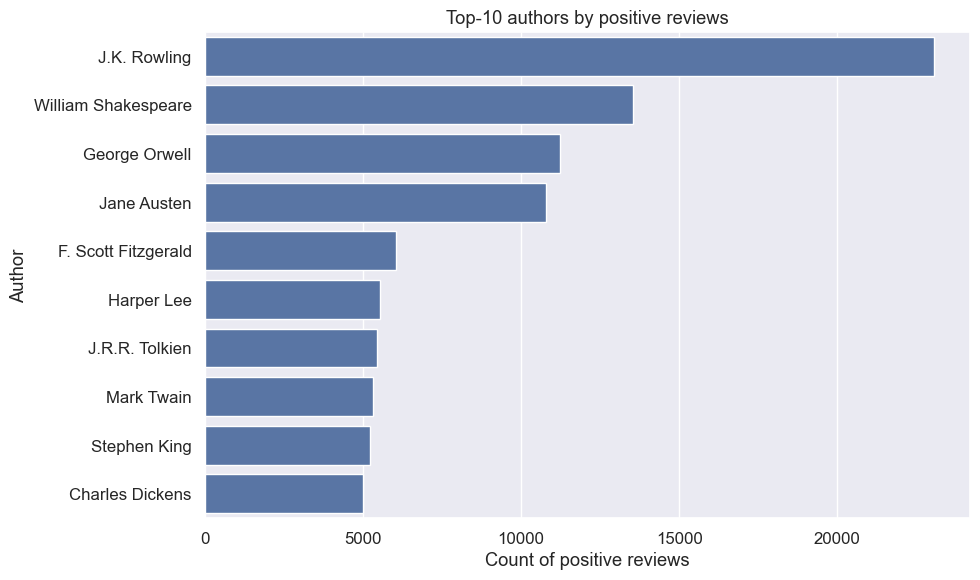

In [9]:
print("7. Top 10 authors by positive reviews (excluding 'Unknown' and 'Anonymous'):")
print("- Filters out books with missing or anonymous author names")
print("- Counts how many times each author received a positive review")
print("- Displays a bar chart of the 10 most positively reviewed authors\n")

positive_clean_authors = filtered_positive[
    ~filtered_positive['Authors'].isin(['Unknown', 'Anonymous'])
]

top_authors = (
    positive_clean_authors['Authors']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top-10 authors by positive reviews')
plt.xlabel('Count of positive reviews')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


8. Analysis of positive reviews by publication decade:
- Adds a 'Decade' column based on the publication year
- Filters for only positive ratings ('it was amazing', 'really liked it')
- Groups and counts the number of positive reviews per decade
- Displays a bar chart showing the distribution of positive reviews by decade



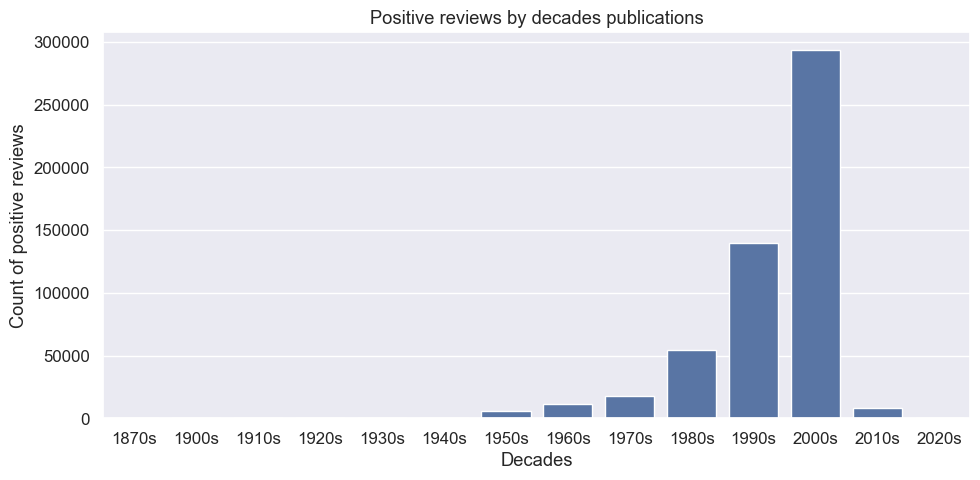

In [10]:
print("8. Analysis of positive reviews by publication decade:")
print("- Adds a 'Decade' column based on the publication year")
print("- Filters for only positive ratings ('it was amazing', 'really liked it')")
print("- Groups and counts the number of positive reviews per decade")
print("- Displays a bar chart showing the distribution of positive reviews by decade\n")

#"Decade" column
merged_df['Decade'] = (merged_df['PublishYear'] // 10 * 10).astype(str) + 's'

# filte
positive = merged_df[merged_df['Rating'].isin(['it was amazing', 'really liked it'])]

# grouping
decade_loved = positive['Decade'].value_counts().sort_index()

# visualization

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_loved.index, y=decade_loved.values)
plt.title('Positive reviews by decades publications')
plt.xlabel('Decades')
plt.ylabel('Count of positive reviews')
plt.tight_layout()
plt.show()


In [11]:
print("9. Preparing data for linear regression model:")
print("- Creates a filtered copy of the dataset excluding extreme outliers in 'CountsOfReview'")
print("- Converts categorical variable 'LengthCategory' into dummy variables")
print("- Reduces dimensionality for 'Language' and 'Publisher' by keeping only the top 5 values and grouping others as 'Other'")
print("- Applies one-hot encoding to the reduced 'Language' and 'Publisher' columns")
print("- Applies log transformation to the target variable 'CountsOfReview' to reduce skewness")
print("- Selects numerical and encoded categorical features for modeling\n")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Copy of df
reg_df = df.copy()

# Deleting extremal points
reg_df = reg_df[reg_df['CountsOfReview'] < 100000]

# Coding LengthCategory (short/medium/long)
reg_df = pd.get_dummies(reg_df, columns=['LengthCategory'], drop_first=True)

# Only 5 lang and publishers (otherwise it will be a lot of dummies)
top_langs = reg_df['Language'].value_counts().nlargest(5).index
reg_df['Language'] = reg_df['Language'].apply(lambda x: x if x in top_langs else 'Other')

top_publishers = reg_df['Publisher'].value_counts().nlargest(5).index
reg_df['Publisher'] = reg_df['Publisher'].apply(lambda x: x if x in top_publishers else 'Other')

reg_df = pd.get_dummies(reg_df, columns=['Language', 'Publisher'], drop_first=True)

# Logging target review
reg_df['LogCounts'] = np.log1p(reg_df['CountsOfReview'])

# Getting signes of features
features = ['pagesNumber', 'PublishYear'] + \
           [col for col in reg_df.columns if col.startswith('LengthCategory_')] + \
           [col for col in reg_df.columns if col.startswith('Language_')] + \
           [col for col in reg_df.columns if col.startswith('Publisher_')]

X = reg_df[features]
y = reg_df['LogCounts']

9. Preparing data for linear regression model:
- Creates a filtered copy of the dataset excluding extreme outliers in 'CountsOfReview'
- Converts categorical variable 'LengthCategory' into dummy variables
- Reduces dimensionality for 'Language' and 'Publisher' by keeping only the top 5 values and grouping others as 'Other'
- Applies one-hot encoding to the reduced 'Language' and 'Publisher' columns
- Applies log transformation to the target variable 'CountsOfReview' to reduce skewness
- Selects numerical and encoded categorical features for modeling



In [12]:
print("10. Training and evaluating linear regression model:")
print("- Splits the dataset into training and testing sets (80/20 split)")
print("- Trains a linear regression model on the training data")
print("- Predicts log-transformed review counts on the test set")
print("- Evaluates the model using R² and RMSE (on log scale)\n")

# Dividing train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Score
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE (log scale): {rmse:.4f}")

10. Training and evaluating linear regression model:
- Splits the dataset into training and testing sets (80/20 split)
- Trains a linear regression model on the training data
- Predicts log-transformed review counts on the test set
- Evaluates the model using R² and RMSE (on log scale)

R²: 0.2178
RMSE (log scale): 1.2138


In [13]:
print("11. Analyzing model coefficients:")
print("- Creates a DataFrame listing each feature with its corresponding regression coefficient")
print("- Sorts the features by the absolute value of their coefficients to highlight the most influential predictors\n")
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

11. Analyzing model coefficients:
- Creates a DataFrame listing each feature with its corresponding regression coefficient
- Sorts the features by the absolute value of their coefficients to highlight the most influential predictors

                                   Feature   Coefficient
6                           Language_en-US  1.815254e+00
7                             Language_eng  1.483389e+00
5                           Language_en-GB  1.088239e+00
9                          Publisher_Other  5.277824e-01
12                      Publisher_Springer -3.042900e-01
10  Publisher_Oxford University Press, USA  2.772788e-01
3                     LengthCategory_short -2.256314e-01
13             Publisher_Unknown Publisher  1.339054e-01
2                    LengthCategory_medium -1.296877e-01
4                Language_Unknown Language -8.710307e-02
11                     Publisher_Routledge -5.677340e-02
8                             Language_fre  2.906796e-02
1                        